In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [99]:
data = pd.read_csv('dataset_pca.csv')

In [100]:
data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Target
0,1.764052,3.928262,0.978738,2.240893,1.867558,-0.977278,-1.004467,-0.151357,-0.103219,0.410599,...,-3.517124,-1.706270,1.950775,-0.509652,-0.438074,-2.128944,0.777490,-1.613898,-0.212740,0
1,-0.895467,-1.404031,-0.510805,-1.180632,-0.028182,0.428332,0.923181,0.302472,-0.634322,-0.362741,...,0.416091,0.208275,0.976639,0.356366,0.706573,1.423646,1.785870,0.126912,0.401989,0
2,1.883151,2.418542,-1.270485,0.969397,-1.173123,1.943621,3.473623,-0.747455,1.922942,1.480515,...,-2.543123,0.166673,0.635031,2.383145,0.944479,0.976137,1.117016,-1.315907,-0.461585,0
3,-0.068242,1.576860,-0.744755,-0.826439,-0.098453,-0.663478,-0.200321,-1.079932,-1.147469,-0.437820,...,-2.318663,-0.039283,-1.168093,0.523277,-0.171546,0.428698,0.823504,2.163236,1.336528,1
4,-0.369182,-0.977743,1.099660,0.655264,0.640132,-1.616956,-3.258238,-0.738031,0.279925,-0.098150,...,-1.672146,-0.132881,-0.297791,-0.309013,-1.676004,-2.199676,1.079619,-0.813364,-1.466424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.043379,-0.826777,-0.727501,0.188103,-0.670483,0.348664,1.422159,-0.304524,0.453955,0.504605,...,0.808602,2.202183,0.525783,0.573987,1.213993,3.581550,0.197446,0.522861,-0.466308,0
996,-0.820583,-0.431467,0.477275,-0.288335,1.103792,-0.465606,-0.988499,0.192902,-1.248016,-0.261305,...,0.445467,0.648032,-0.083334,1.946623,-0.962690,-1.735224,0.245042,0.643848,0.541447,0
997,-1.600970,-1.949079,-0.571354,-0.169844,-0.096264,0.790794,1.214013,0.254565,-0.173184,-2.010247,...,1.063865,0.781444,-0.964771,-0.846544,-0.500810,-1.567974,1.029909,-1.221982,-0.922341,1
998,-0.041317,0.650100,-0.415066,-0.369719,1.327831,1.130079,3.119672,-2.105837,0.411796,1.406908,...,-0.547483,0.953261,2.842246,0.732323,2.383773,3.350213,-0.244134,-1.059849,0.065914,1


In [101]:
X = data.drop(columns = 'Target')

In [102]:
y = data['Target']

In [103]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=9)

In [104]:
%%time
model = LogisticRegression()
model.fit(train_X,train_y)

CPU times: user 19.8 ms, sys: 27.7 ms, total: 47.5 ms
Wall time: 17.3 ms


LogisticRegression()

In [105]:
%%time
train_y_pred = model.predict(train_X)
test_y_pred = model.predict(test_X)


CPU times: user 3.75 ms, sys: 12.2 ms, total: 16 ms
Wall time: 1.91 ms


In [106]:
accuracy_score(train_y, train_y_pred)

0.57375

In [107]:
confusion_matrix(train_y, train_y_pred)

array([[202, 187],
       [154, 257]])

In [108]:
accuracy_score(test_y, test_y_pred)

0.49

In [109]:
confusion_matrix(test_y, test_y_pred)

array([[46, 61],
       [41, 52]])

# Application of Principal Component Analysis

In [110]:
pca = PCA()

In [111]:
train_X_pca = pca.fit_transform(train_X)

In [112]:
train_X_pca.shape

(800, 50)

In [113]:
test_X_pca = pca.transform(test_X)

In [114]:
test_X_pca.shape

(200, 50)

In [115]:
pca.explained_variance_ratio_

array([0.08134194, 0.07455008, 0.07324362, 0.06898252, 0.06535832,
       0.06298465, 0.06000901, 0.05780109, 0.05479319, 0.0523011 ,
       0.01511978, 0.01484388, 0.01470165, 0.0140368 , 0.01365644,
       0.01333755, 0.01291479, 0.01285381, 0.01232707, 0.01201324,
       0.01185599, 0.01157416, 0.01122842, 0.01109399, 0.01091429,
       0.01066773, 0.01034776, 0.01019423, 0.01003196, 0.00980082,
       0.00947158, 0.00931116, 0.00930155, 0.00903556, 0.00883913,
       0.00856754, 0.00827015, 0.00812019, 0.0080004 , 0.00755432,
       0.00225582, 0.00212018, 0.00205604, 0.00193572, 0.00191947,
       0.00178257, 0.00175602, 0.00165174, 0.00159954, 0.00157142])

In [116]:
pd.DataFrame(train_X_pca, columns=train_X.columns+'_pca')

,Feature_1_pca,Feature_2_pca,Feature_3_pca,Feature_4_pca,Feature_5_pca,Feature_6_pca,Feature_7_pca,Feature_8_pca,Feature_9_pca,Feature_10_pca,...,Feature_41_pca,Feature_42_pca,Feature_43_pca,Feature_44_pca,Feature_45_pca,Feature_46_pca,Feature_47_pca,Feature_48_pca,Feature_49_pca,Feature_50_pca
0,1.663795,-1.233057,-1.726133,-1.093130,-1.132528,0.205163,-3.597179,1.744435,-0.841221,0.645943,...,0.308276,0.495769,-0.645024,0.162768,-0.461427,-0.853304,-0.260223,-0.320253,-0.759713,-0.014658
1,3.158565,-6.098678,2.672425,-4.097254,1.885940,-1.605220,-0.681835,-0.657623,-3.598573,-0.113032,...,0.254341,0.174403,0.137069,-0.091286,-0.244935,0.287132,-0.683897,-0.059968,-0.162342,0.367689
2,0.614947,0.349885,-1.944726,0.709509,-3.445001,1.379235,-3.998269,0.046112,-1.886547,1.368777,...,0.386407,0.221112,0.293346,-0.105776,0.624981,0.779086,-0.051040,-0.851839,0.527219,-0.371040
3,-2.643229,-3.002461,0.001482,-4.401993,-1.200095,-1.000731,1.108938,1.431656,1.656240,-1.527671,...,-0.217562,0.472913,0.115915,-0.104266,-0.017419,-0.278531,0.174386,-0.350643,-0.044944,0.460211
4,1.976035,-0.174406,1.281615,1.143833,0.322488,-2.977358,-2.697826,1.058035,1.430560,-0.277156,...,-0.075727,0.047732,0.324545,-0.202282,0.199982,0.267197,0.122546,0.055282,0.804755,-0.011581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.312212,-1.381257,2.215257,-4.125009,1.565236,0.067642,-0.460042,-1.434634,0.005554,0.066844,...,0.064775,-0.114827,-0.830848,0.142408,-0.270675,-0.459898,0.581858,-0.475469,-0.569315,0.182467
796,-1.851448,-1.119812,2.482063,0.227006,-1.757147,-2.607302,-1.399150,4.493227,-0.980786,1.134432,...,0.348091,-0.039425,-0.664964,-0.455469,-1.115842,0.356190,0.103696,-0.111207,-0.446954,-0.085992
797,-0.265739,2.374410,3.502268,-4.694818,-0.780786,-1.195079,1.434367,-2.406009,0.055869,-1.289946,...,0.427694,0.297582,-0.572329,0.411639,0.097985,-0.246473,0.337806,0.596779,-0.033060,0.360349
798,-0.928621,1.196955,-5.708260,-1.346720,-5.111638,-2.051820,-2.622622,0.140284,2.042328,-3.404773,...,-0.162368,-0.712381,0.002987,0.275080,-0.307039,-0.170396,0.006377,-0.086233,-0.039586,-0.335288


In [117]:
np.cumsum(pca.explained_variance_ratio_)

array([0.08134194, 0.15589202, 0.22913564, 0.29811816, 0.36347648,
       0.42646113, 0.48647015, 0.54427124, 0.59906442, 0.65136552,
       0.6664853 , 0.68132919, 0.69603084, 0.71006764, 0.72372408,
       0.73706163, 0.74997642, 0.76283023, 0.7751573 , 0.78717054,
       0.79902653, 0.81060069, 0.82182911, 0.83292311, 0.8438374 ,
       0.85450513, 0.8648529 , 0.87504712, 0.88507909, 0.89487991,
       0.90435149, 0.91366265, 0.9229642 , 0.93199975, 0.94083888,
       0.94940643, 0.95767658, 0.96579677, 0.97379716, 0.98135149,
       0.98360731, 0.98572748, 0.98778353, 0.98971925, 0.99163872,
       0.99342129, 0.99517731, 0.99682904, 0.99842858, 1.        ])

Text(0.5, 1.0, 'Cumulative Explained Variance by PCA')

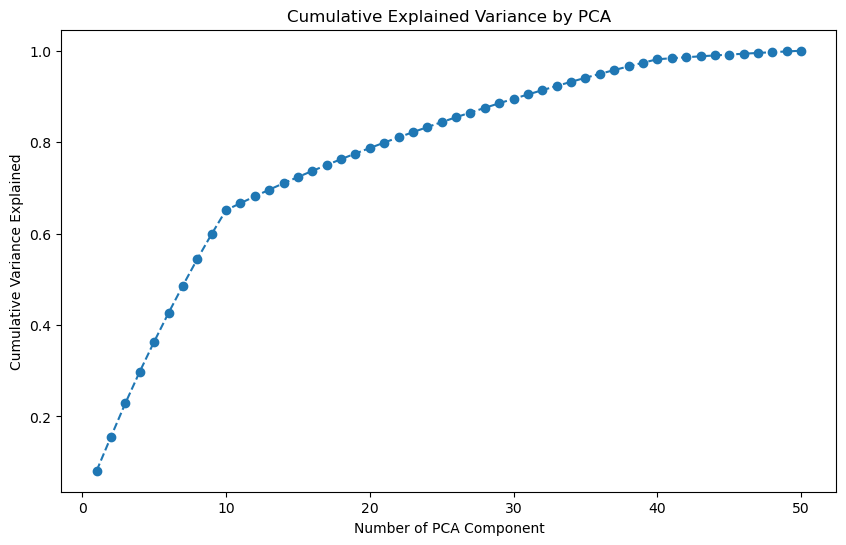

In [118]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51), np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.xlabel('Number of PCA Component')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance by PCA')

# We will go with 10 PCA Component based on the above chart

In [161]:
pca = PCA(n_components=10)

In [162]:
train_X_pca = pca.fit_transform(train_X)

In [163]:
train_X_pca.shape

(800, 10)

In [164]:
test_X_pca = pca.transform(test_X)

In [165]:
test_X_pca.shape

(200, 10)

In [166]:
%%time
model = LogisticRegression()
model.fit(train_X_pca,train_y)

CPU times: user 5.63 ms, sys: 1.76 ms, total: 7.39 ms
Wall time: 5.72 ms


LogisticRegression()

In [167]:
%%time
train_y_pred = model.predict(train_X_pca)
test_y_pred = model.predict(test_X_pca)


CPU times: user 1.32 ms, sys: 336 µs, total: 1.66 ms
Wall time: 1.42 ms


In [168]:
accuracy_score(train_y, train_y_pred)

0.5425

In [169]:
confusion_matrix(train_y, train_y_pred)

array([[163, 226],
       [140, 271]])

In [170]:
accuracy_score(test_y, test_y_pred)

0.485

In [171]:
confusion_matrix(test_y, test_y_pred)

array([[39, 68],
       [35, 58]])

# Plotting using PCA Component

In [172]:
pca = PCA(n_components=2)

train_X_pca = pca.fit_transform(train_X)

In [173]:
train_X_pca

array([[ 1.66378985, -1.23303249],
       [ 3.15855909, -6.09870386],
       [ 0.6149483 ,  0.34989287],
       ...,
       [-0.26573436,  2.37442795],
       [-0.92862505,  1.19695974],
       [ 0.43182473, -1.68688175]])

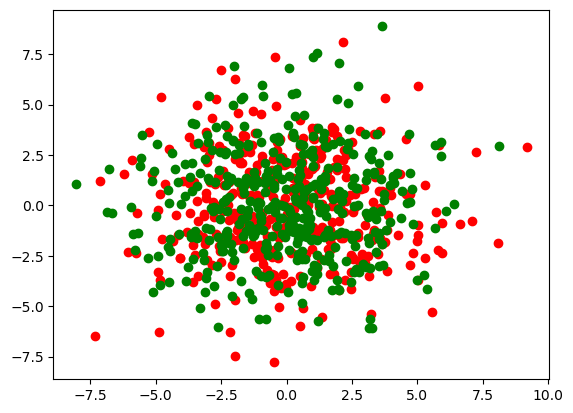

In [176]:
colors=['r','g']
for i in range(2):
    plt.scatter(train_X_pca[train_y==i,0], train_X_pca[train_y==i,1], c=colors[i], label=str(i))

In [177]:
from sklearn.datasets import load_digits

In [216]:
digits = load_digits(n_class=7)
X = digits.data
y = digits.target

In [217]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [218]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

0


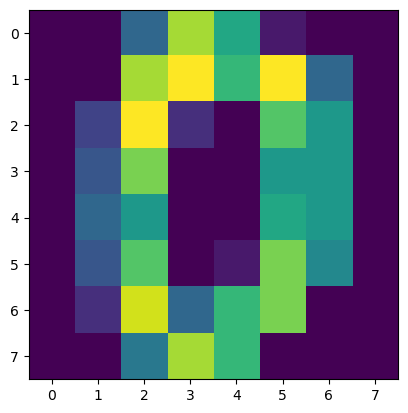

1


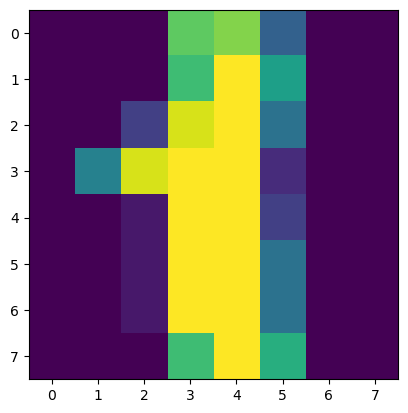

2


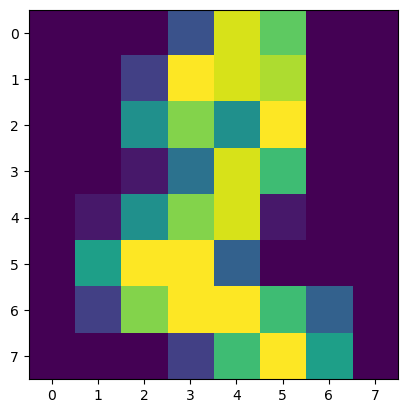

3


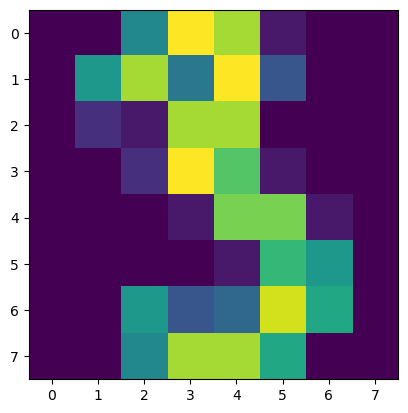

4


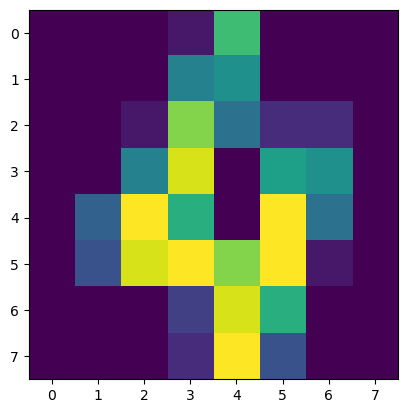

5


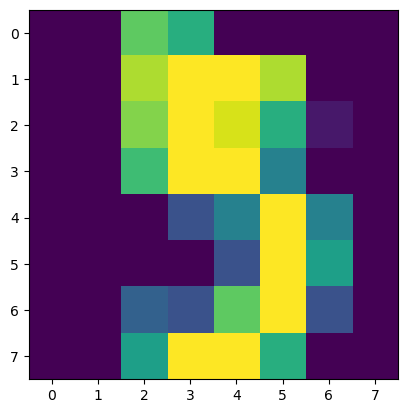

6


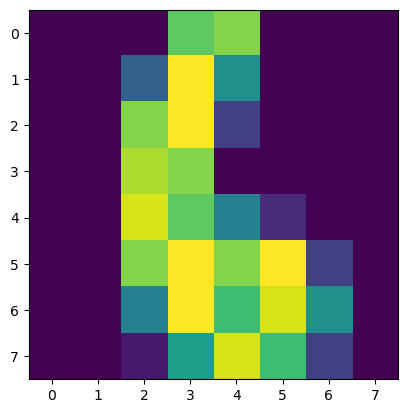

0


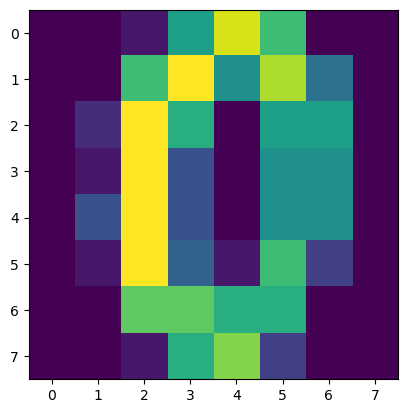

1


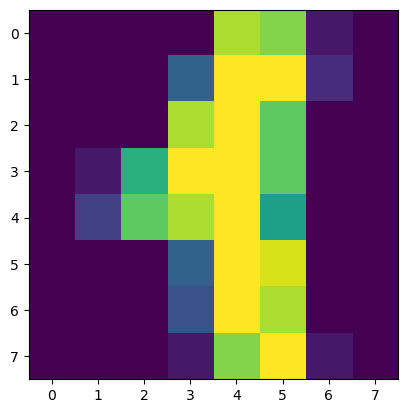

2


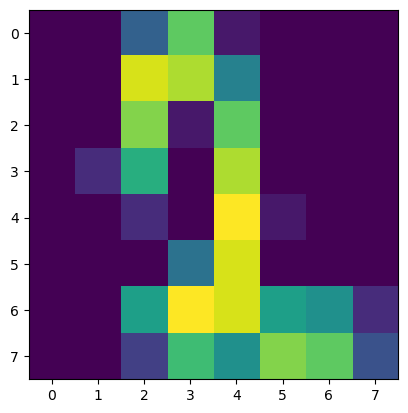

In [219]:
for i in range(0,10):
    print(y[i])
    plt.imshow(np.array(X[i]).reshape(8,8))
    plt.show()

In [220]:
y

array([0, 1, 2, ..., 4, 4, 0])

# PCA vs T-SNE

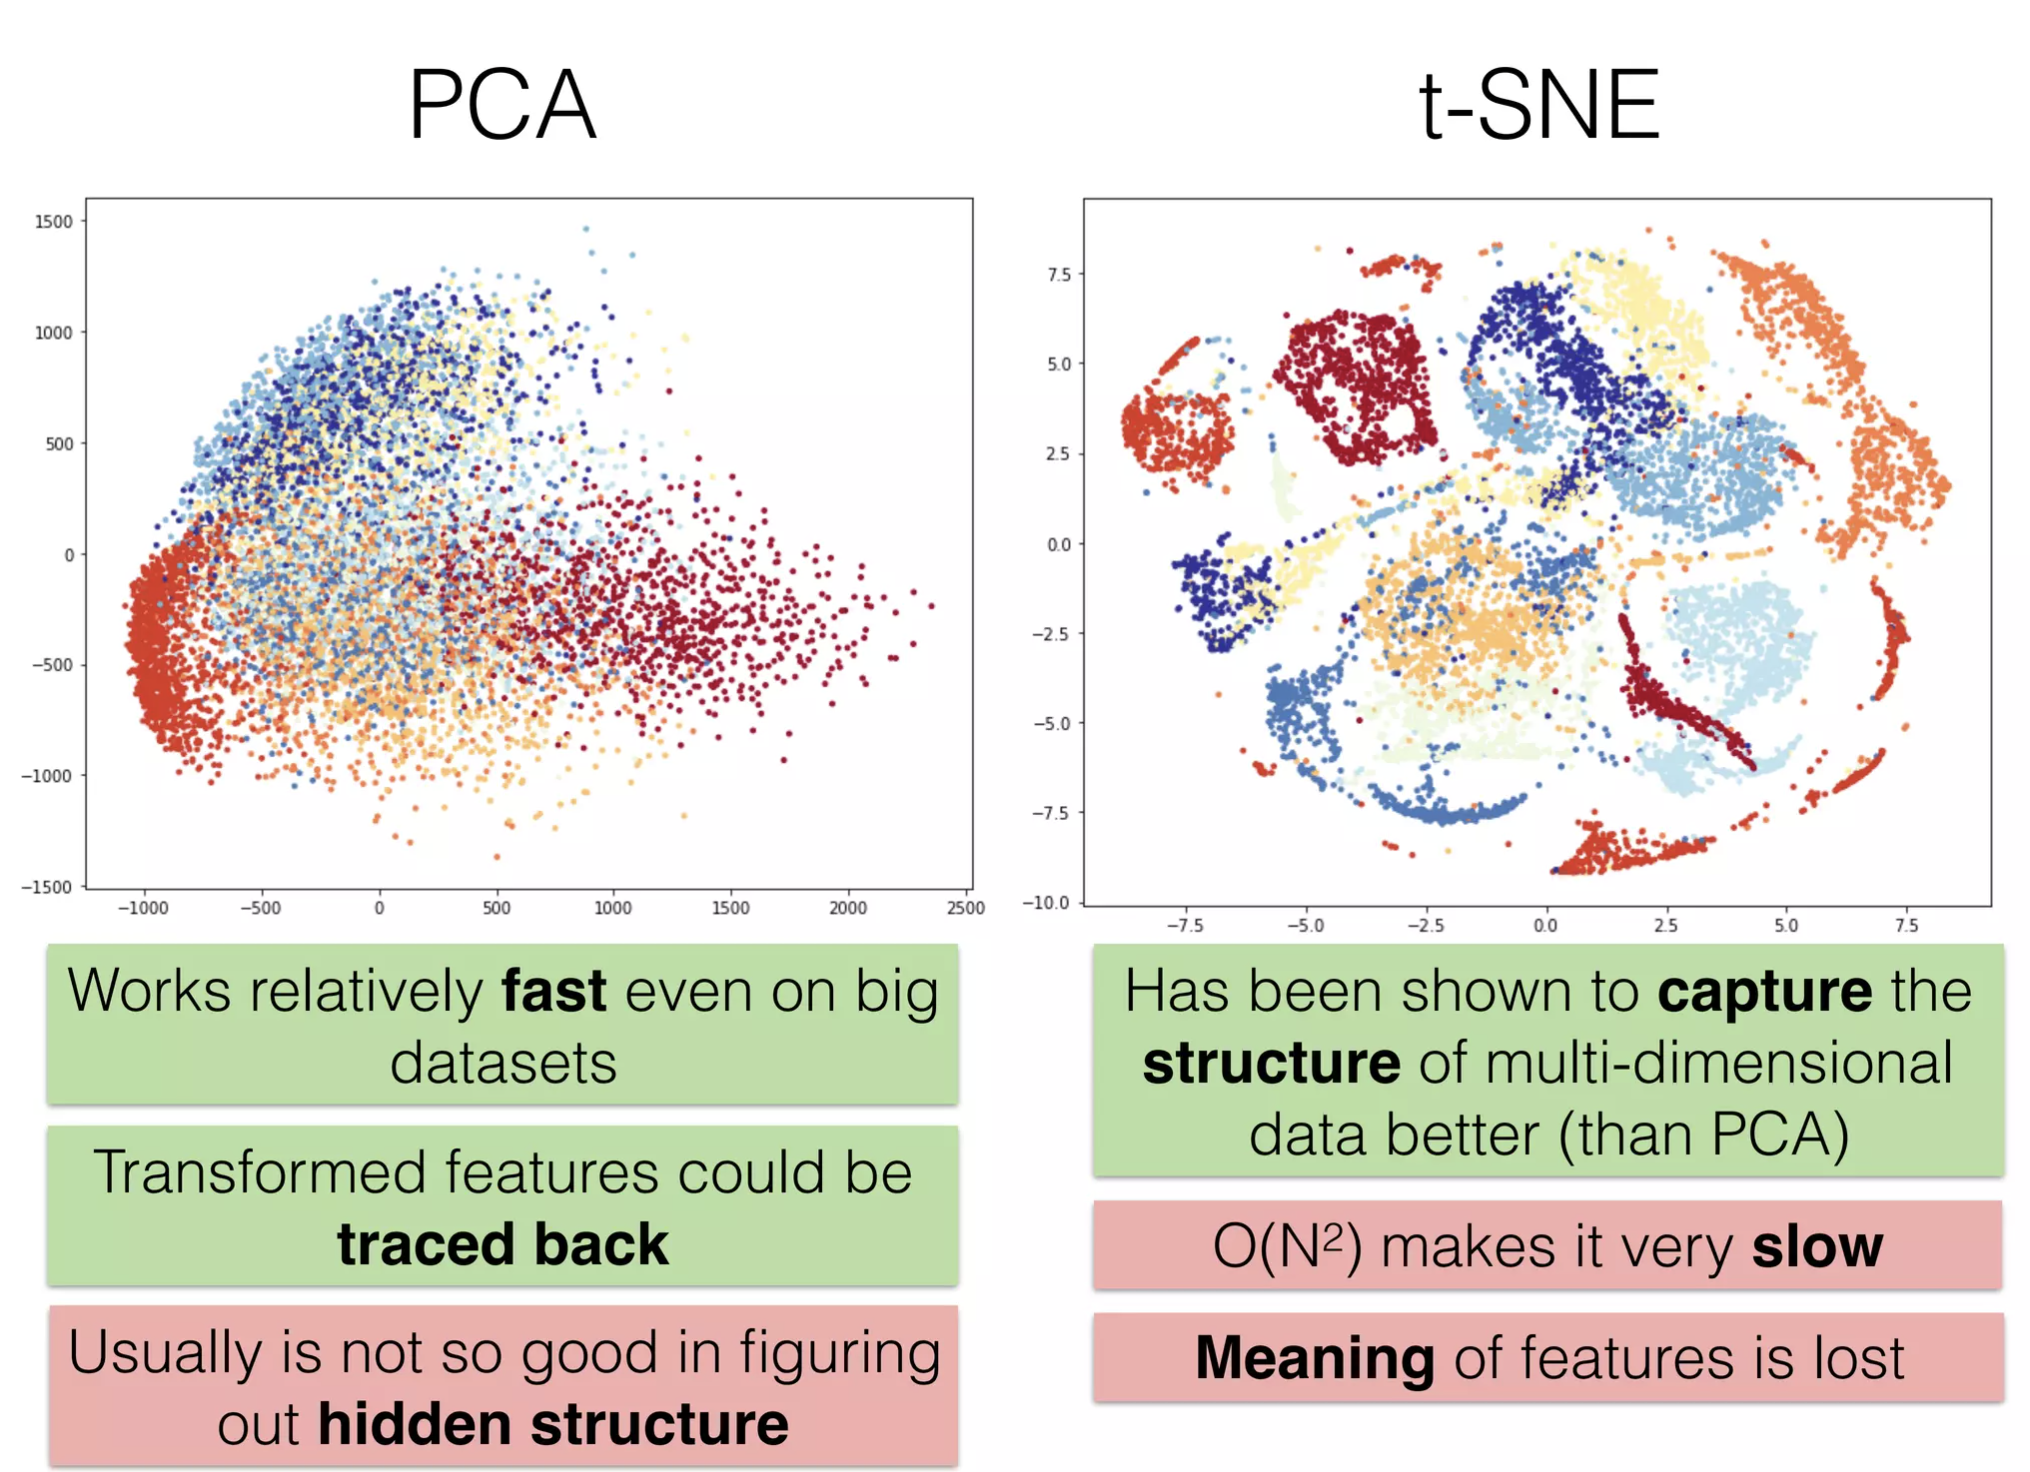

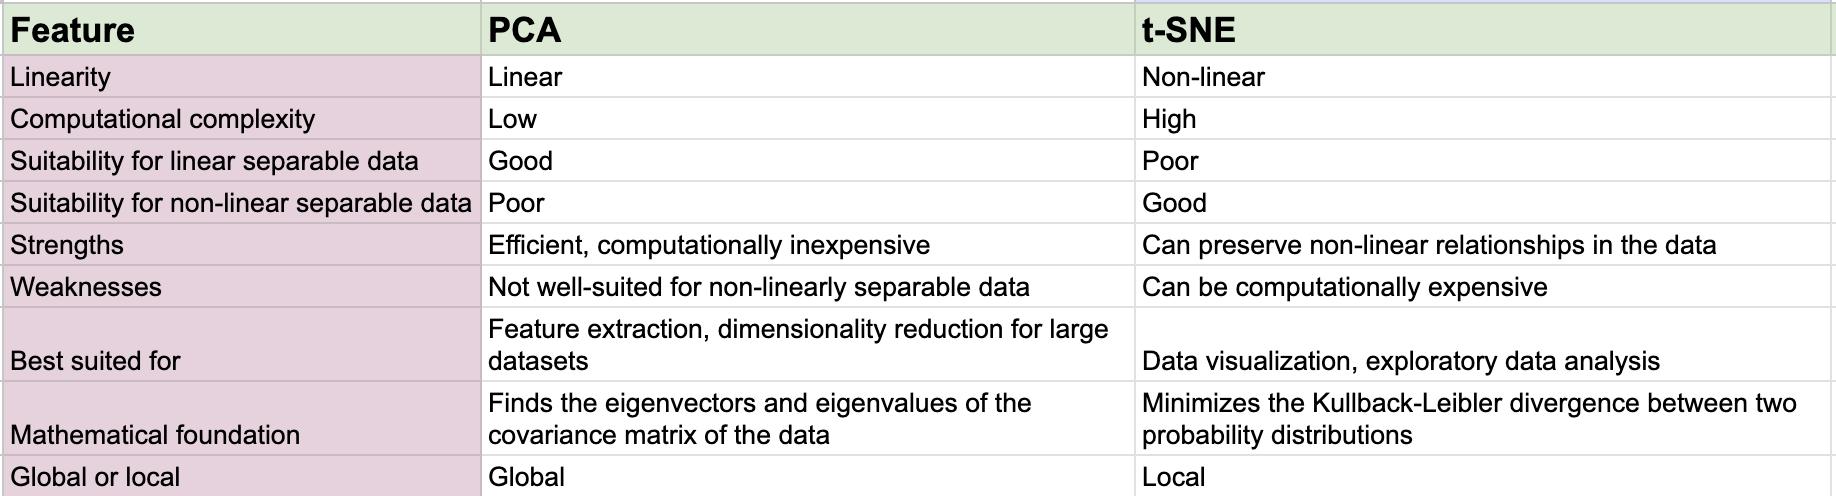

In [227]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
x_num_pca = pca.fit_transform(X)
x_num_tsne = tsne.fit_transform(X)

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


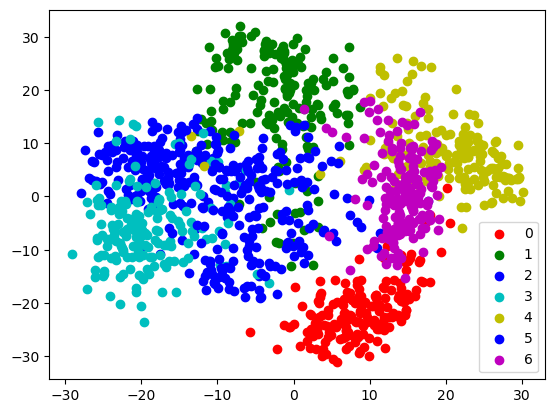

In [225]:
colors=['r','g','b','c','y','b','m']
for i in range(7):
    plt.scatter(x_num_pca[y==i,0], x_num_pca[y==i,1], c=colors[i], label=str(i))
plt.legend()

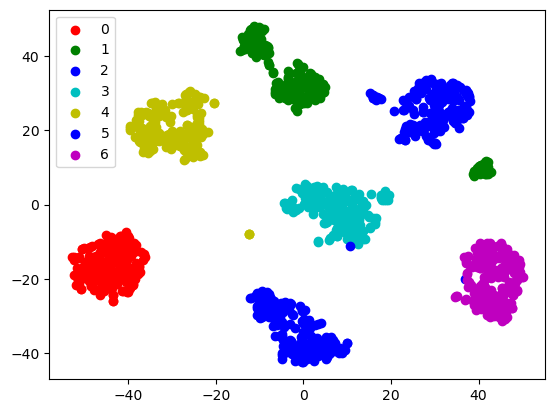

In [228]:
colors=['r','g','b','c','y','b','m']
for i in range(7):
    plt.scatter(x_num_tsne[y==i,0], x_num_tsne[y==i,1], c=colors[i], label=str(i))
plt.legend()